# Import Parser

In [2]:
import swda
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [3]:
corpus = swda.CorpusReader('swda')

# Looking at a single transcript
This section just simply looks at a transcript and to see how the feautres (words) and labels can be extracted.

In [4]:
from swda import Transcript

trans = Transcript('swda/sw00utt/sw_0001_4325.utt.csv', 'swda/swda-metadata.csv')

### label

In [5]:
trans.utterances[2].act_tag

'qy^d'

### word features

In [6]:
trans.utterances[3].pos_words()

['What',
 'kind',
 'of',
 'experience',
 'do',
 'you',
 ',',
 'do',
 'you',
 'have',
 ',',
 'then',
 'with',
 'child',
 'care',
 '?']

# Construct a Dataframe
The data is small enough to hold in memory so we build a dataframe out of it to make EDA and other tasks simpler. The model building doesn't need to use the dataframe necessarily, but it's to extract a series from the dataframe later.

In [7]:
def build_dataframe(data):
    df = pd.DataFrame(data, columns=["utterance"])
    df["conversation_no"] = df["utterance"].apply(lambda x: x.conversation_no)
    df["transcript_index"] = df["utterance"].apply(lambda x: x.transcript_index)
    df["act_tag"] = df["utterance"].apply(lambda x: x.act_tag)
    df["caller"] = df["utterance"].apply(lambda x: x.caller)
    df["utterance_index"] = df["utterance"].apply(lambda x: x.utterance_index)
    df["subutterance_index"] = df["utterance"].apply(lambda x: x.subutterance_index)
    df["words"] = df["utterance"].apply(lambda x: x.pos_words())
    df["act_tag"] = df["utterance"].apply(lambda x: x.act_tag)
    df["damsl_act_tag"] = df["utterance"].apply(lambda x: x.damsl_act_tag())
    
    df.drop(["utterance"], axis=1, inplace=True)
    
    return df

In [8]:
data = [x for x in corpus.iter_utterances()]

In [9]:
df = build_dataframe(data)
df

,conversation_no,transcript_index,act_tag,caller,utterance_index,subutterance_index,words,damsl_act_tag
0,3774,0,sd,A,1,1,"[So, I, 've, been, concerned, about, crime, la...",sd
1,3774,1,b,B,2,1,"[Uh-huh, .]",b
2,3774,2,sv,A,3,1,"[Uh, ,, it, 's, really, scary, to, listen, to,...",sv
3,3774,3,b,B,4,1,"[Uh-huh, .]",b
4,3774,4,+,A,5,1,"[--, to, hear, about, all, the, problems, .]",+
...,...,...,...,...,...,...,...,...
221611,2963,230,fc,A,151,1,"[All, right, .]",fc
221612,2963,231,fc,B,152,1,"[Good, luck, in, everything, .]",fc
221613,2963,232,fc,A,153,1,"[All, right, ,, you, too, .]",fc
221614,2963,233,fc,B,154,1,"[Bye-bye, .]",fc


In [10]:
data[0].conversation_no

3774

# Train, Test Split
This is to split out the training examples in the same manner previous papers had done. Although, previous papers mention 19 conversations were used with 4000 utterances. It is important to split on the transcript rather than utterance because splitting transcripts up causes the context to be lost. I found the following set of indexes from the short-text-classification repository:

swda_test_set_idx = {'sw2121', 'sw2131', 'sw2151', 'sw2229', 'sw2335', 'sw2434', 'sw2441', 'sw2461',
                'sw2503', 'sw2632', 'sw2724', 'sw2752', 'sw2753', 'sw2836', 'sw2838', 'sw3528',
                'sw3756', 'sw3942', 'sw3994'} # 19
                
2121
2131
2151
2229
2335
2434
2441
2461
2503
2632
2724
2752
2753
2836
2838
3528
3756
3942
3994

In [11]:
test_indices = [2121, 2131, 2151, 2229, 2335, 2434, 2441, 2461, 2503, 2632, 2724, 2752, 2753, 2836, 2838, 3528, 3756, 3942, 3994]

In [12]:
test_df = df[df['conversation_no'].isin(test_indices)]
train_df = df[~df['conversation_no'].isin(test_indices)]

# DAMSL Tag EDA
I think we need to look into the tags and figure out what the mean and whether they are relevant. For example, the 'x' tag means Non-verbal, while a '+' means the speaker was interrupted from their previous sentence and '%' is uninterpretable.

In [13]:
train_df[train_df['act_tag'] == "x"]

,conversation_no,transcript_index,act_tag,caller,utterance_index,subutterance_index,words,damsl_act_tag
9,3774,9,x,A,9,1,[],x
15,3774,15,x,A,11,2,[.],x
45,3774,46,x,B,34,1,[],x
47,3774,48,x,B,36,1,[],x
73,3774,78,x,A,55,1,[],x
...,...,...,...,...,...,...,...,...
221524,2963,141,x,A,91,1,[],x
221526,2963,143,x,A,93,1,[],x
221528,2963,145,x,A,95,1,[],x
221534,2963,151,x,A,99,1,[],x


In [14]:
train_df[train_df['act_tag'] == "+"]

,conversation_no,transcript_index,act_tag,caller,utterance_index,subutterance_index,words,damsl_act_tag
4,3774,4,+,A,5,1,"[--, to, hear, about, all, the, problems, .]",+
25,3774,25,+,A,17,1,"[--, so, we, 've, been, trying, to, install, s...",+
28,3774,28,+,A,19,1,"[--, we, put, up, a, fence, in, the, backyard, .]",+
31,3774,31,+,A,21,1,"[--, playing, in, the, yard, .]",+
33,3774,33,+,A,23,1,"[You, know, .]",+
...,...,...,...,...,...,...,...,...
221543,2963,160,+,B,106,1,"[--, to, do, .]",+
221545,2963,164,+,A,109,1,"[just, about, a, foot, deep, .]",+
221561,2963,180,+,B,120,1,"[--, bringing, something, for, a, potluck, pic...",+
221590,2963,209,+,B,138,1,"[had, our, ,]",+


In [15]:
train_df[train_df['act_tag'] == "%"]

,conversation_no,transcript_index,act_tag,caller,utterance_index,subutterance_index,words,damsl_act_tag
10,3774,10,%,B,10,1,"[I, 'm, not, real, ,]",%
13,3774,13,%,B,10,4,"[so, --]",%
50,3774,52,%,A,39,2,"[and, ,]",%
58,3774,61,%,B,44,2,"[so, --]",%
61,3774,66,%,B,48,2,"[so, ,]",%
...,...,...,...,...,...,...,...,...
221558,2963,177,%,A,117,1,"[That, 's, the, ,]",%
221562,2963,181,%,B,120,2,"[and, oh, ,, grand, ,]",%
221563,2963,182,%,B,120,3,"[yeah, .]",%
221570,2963,189,%,B,124,1,"[I, hope, ,]",%


As can be seen in the plot below, the tags sd, b, sv, +, % and aa are by far the most common ones. sd, short for Statement-non-opinion, is around 35% of all utterances and could potentially be seen as a baseline accuracy where the most popular act tag is used as a guess.

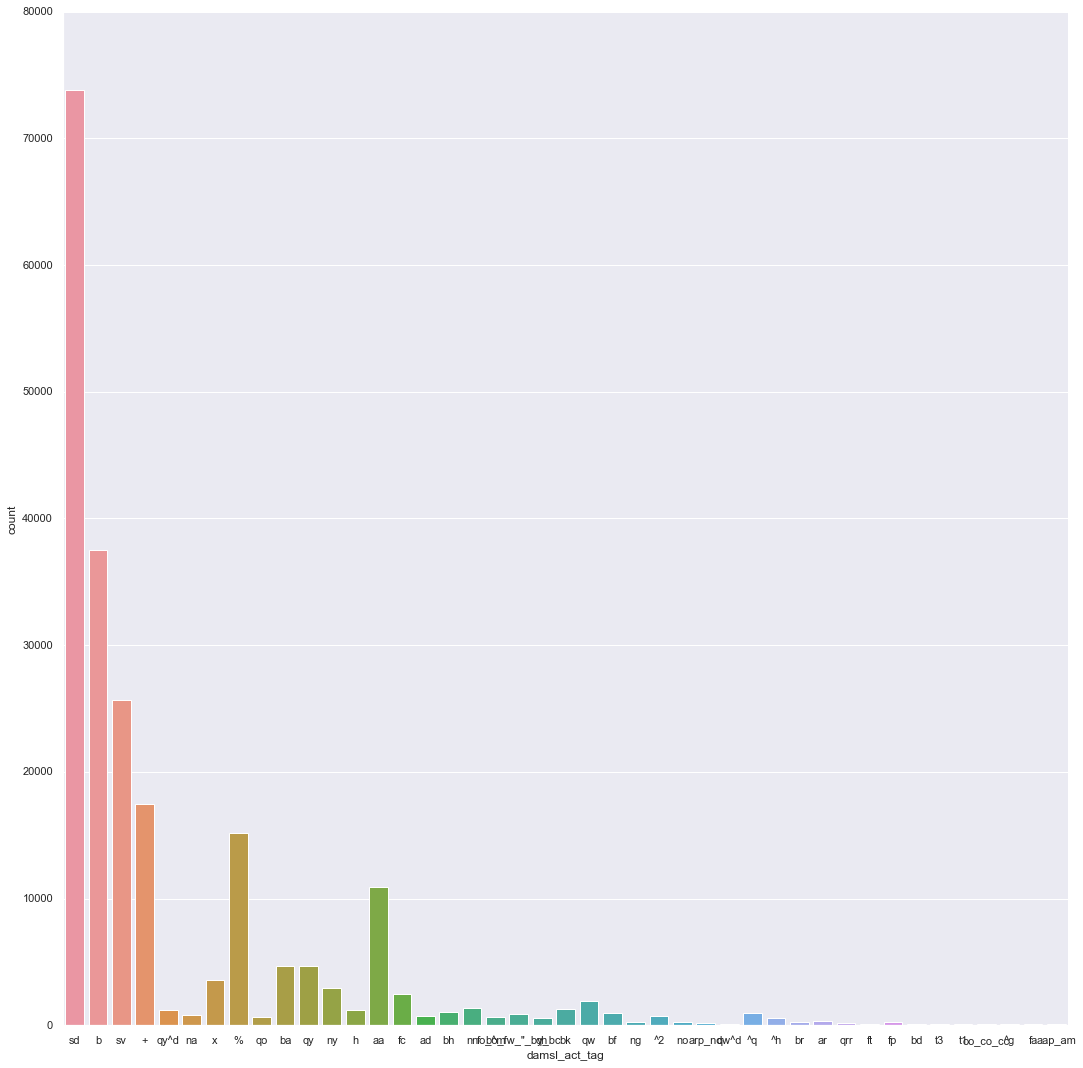

In [16]:
sns.catplot('damsl_act_tag', data=train_df, kind="count", height=15)

If the table below is examined further it can be seen that certain acts happen very rarely.

In [17]:
train_df.groupby('damsl_act_tag', sort=True).count().reset_index().sort_values('conversation_no', ascending=False)

,damsl_act_tag,conversation_no,transcript_index,act_tag,caller,utterance_index,subutterance_index,words
38,sd,73826,73826,73826,73826,73826,73826,73826
11,b,37533,37533,37533,37533,37533,37533,37533
39,sv,25708,25708,25708,25708,25708,25708,25708
1,+,17496,17496,17496,17496,17496,17496,17496
0,%,15190,15190,15190,15190,15190,15190,15190
6,aa,10925,10925,10925,10925,10925,10925,10925
13,ba,4688,4688,4688,4688,4688,4688,4688
36,qy,4642,4642,4642,4642,4642,4642,4642
42,x,3536,3536,3536,3536,3536,3536,3536
29,ny,2961,2961,2961,2961,2961,2961,2961
